# Olympic Swimmin Sports Analysis
Source: https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results?select=noc_regions.csv
<br>
Date of download: 12/07/2021
<br>
Inspiration and reference for wrangling: https://www.kaggle.com/jlove5/olympic-data-women-s-gymnastics

In [94]:
# Imports

import pandas as pd
import requests as req
import numpy as np
import seaborn as sns

In [4]:
#Read the data files

athlete_raw = pd.read_csv("athlete_events.csv")
noc_raw = pd.read_csv("noc_regions.csv")

In [9]:
athlete_raw.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


In [8]:
athlete_raw.tail(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [7]:
noc_raw.head(3)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN


In [11]:
# Get list of events

athlete_raw["Sport"].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Speed Skating',
       'Cross Country Skiing', 'Athletics', 'Ice Hockey', 'Swimming',
       'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Art Competitions', 'Alpine Skiing', 'Handball', 'Weightlifting',
       'Wrestling', 'Luge', 'Water Polo', 'Hockey', 'Rowing', 'Bobsleigh',
       'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo',
       'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon',
       'Figure Skating', 'Golf', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Table Tennis', 'Nordic Combined',
       'Baseball', 'Rhythmic Gymnastics', 'Freestyle Skiing',
       'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon',
       'Ski Jumping', 'Curling', 'Snowboarding', 'Rugby',
       'Short Track Speed Skating', 'Skeleton', 'Lacrosse', 'Polo',
       'Cricket', 'Racquets', 'Motorboating', 'Military Ski Patrol',
       'Croquet', 'Jeu De Paume', 'Roque', 'Al

### Approach 1: Filter by Season

In [19]:
athlete_raw["Season"].unique()

array(['Summer', 'Winter'], dtype=object)

In [22]:
# This dataframe has only Summer games -- 222552 atheltes

df = athlete_raw.loc[athlete_raw["Season"]=="Summer"]
df.shape

(222552, 15)

In [23]:
df.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


In [24]:
df.tail(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN
271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN
271110,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,NaN


In [25]:
df["Games"].unique()

array(['1992 Summer', '2012 Summer', '1920 Summer', '1900 Summer',
       '1932 Summer', '1952 Summer', '2000 Summer', '1996 Summer',
       '1912 Summer', '1924 Summer', '1948 Summer', '2008 Summer',
       '2016 Summer', '2004 Summer', '1984 Summer', '1968 Summer',
       '1972 Summer', '1988 Summer', '1936 Summer', '1956 Summer',
       '1960 Summer', '1928 Summer', '1976 Summer', '1980 Summer',
       '1964 Summer', '1906 Summer', '1904 Summer', '1908 Summer',
       '1896 Summer'], dtype=object)

### Approach 2: Filter by Sport
Concretely, focus on Swimming events for the heatmap

In [28]:
# This df will have all the records of athletes competing at swimming events, both male and female

df_swim = athlete_raw.loc[athlete_raw["Sport"]=="Swimming"]
df_swim.sample(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
8455,4655,Yukiyoshi Aoki,M,17.0,NaN,NaN,Japan,JPN,1952 Summer,1952,Summer,Helsinki,Swimming,"Swimming Men's 1,500 metres Freestyle",NaN
246428,123396,Simon Upton,M,19.0,198.0,82.0,Australia,AUS,1988 Summer,1988,Summer,Seoul,Swimming,Swimming Men's 200 metres Backstroke,NaN
96927,49080,Margaret Josephine Hoelzer,F,25.0,180.0,79.0,United States,USA,2008 Summer,2008,Summer,Beijing,Swimming,Swimming Women's 4 x 100 metres Medley Relay,Silver
107453,54305,Jean Jenni,M,NaN,NaN,NaN,Switzerland,SUI,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 100 metres Freestyle,NaN
145391,72976,Miroslav Machovi,M,24.0,184.0,70.0,Slovakia,SVK,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Men's 100 metres Backstroke,NaN


In [37]:
df_swim[df_swim["Event"].str.contains("yard")==True]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1458,813,Edgar Holmes Adams,M,36.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Swimming,Swimming Men's 220 yard Freestyle,NaN
1459,813,Edgar Holmes Adams,M,36.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Swimming,Swimming Men's 880 yard Freestyle,NaN
48923,25215,"Charles Meldrum ""Charlie"" Daniels",M,19.0,183.0,70.0,United States,USA,1904 Summer,1904,Summer,St. Louis,Swimming,Swimming Men's 50 yard Freestyle,Bronze
48924,25215,"Charles Meldrum ""Charlie"" Daniels",M,19.0,183.0,70.0,United States,USA,1904 Summer,1904,Summer,St. Louis,Swimming,Swimming Men's 100 yard Freestyle,Silver
48925,25215,"Charles Meldrum ""Charlie"" Daniels",M,19.0,183.0,70.0,United States,USA,1904 Summer,1904,Summer,St. Louis,Swimming,Swimming Men's 220 yard Freestyle,Gold
48926,25215,"Charles Meldrum ""Charlie"" Daniels",M,19.0,183.0,70.0,United States,USA,1904 Summer,1904,Summer,St. Louis,Swimming,Swimming Men's 440 yard Freestyle,Gold
74669,37920,"Francis ""Frank"" Gailey",M,22.0,NaN,NaN,Australia,AUS,1904 Summer,1904,Summer,St. Louis,Swimming,Swimming Men's 220 yard Freestyle,Silver
74670,37920,"Francis ""Frank"" Gailey",M,22.0,NaN,NaN,Australia,AUS,1904 Summer,1904,Summer,St. Louis,Swimming,Swimming Men's 440 yard Freestyle,Silver
74671,37920,"Francis ""Frank"" Gailey",M,22.0,NaN,NaN,Australia,AUS,1904 Summer,1904,Summer,St. Louis,Swimming,Swimming Men's 880 yard Freestyle,Silver
77031,39088,"David Thomas Gaul, Sr.",M,17.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Swimming,Swimming Men's 50 yard Freestyle,NaN


In [42]:
# List of events under swimming -- 55 events total split by men and women

df_swim["Event"].unique()

array(["Swimming Men's 400 metres Freestyle",
       "Swimming Men's 200 metres Breaststroke",
       "Swimming Men's 400 metres Breaststroke",
       "Swimming Men's 100 metres Butterfly",
       "Swimming Men's 200 metres Butterfly",
       "Swimming Men's 4 x 100 metres Medley Relay",
       "Swimming Men's 100 metres Freestyle",
       "Swimming Men's 4 x 200 metres Freestyle Relay",
       "Swimming Men's 50 metres Freestyle",
       "Swimming Men's 100 metres Backstroke",
       "Swimming Women's 100 metres Backstroke",
       "Swimming Women's 200 metres Backstroke",
       "Swimming Women's 4 x 100 metres Medley Relay",
       "Swimming Women's 50 metres Freestyle",
       "Swimming Men's 200 metres Freestyle",
       "Swimming Men's 4 x 100 metres Freestyle Relay",
       "Swimming Men's 200 metres Backstroke",
       "Swimming Men's 200 metres Individual Medley",
       "Swimming Men's 400 metres Individual Medley",
       "Swimming Women's 4 x 100 metres Freestyle Relay",
  

In [44]:
# Rename events to make them more concise 
# Will remove male or female distinction as athletes are already separated by gender

df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*400 metres Freestyle.*$)', '400m Freestyle')

<ipython-input-44-de14a8d077f1>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*400 metres Freestyle.*$)', '400m Freestyle')
<ipython-input-44-de14a8d077f1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*400 metres Freestyle.*$)', '400m Freestyle')


In [46]:
df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*200 metres Breaststroke.*$)', '200m Breaststroke')

<ipython-input-46-efe343062413>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*200 metres Breaststroke.*$)', '200m Breaststroke')
<ipython-input-46-efe343062413>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*200 metres Breaststroke.*$)', '200m Breaststroke')


In [48]:
df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*400 metres Breaststroke.*$)', '400m Breaststroke')

<ipython-input-48-4e5b44531393>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*400 metres Breaststroke.*$)', '400m Breaststroke')
<ipython-input-48-4e5b44531393>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*400 metres Breaststroke.*$)', '400m Breaststroke')


In [52]:
df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*100 metres Butterfly.*$)', '100m Butterfly')

<ipython-input-52-333a628a246a>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*100 metres Butterfly.*$)', '100m Butterfly')
<ipython-input-52-333a628a246a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*100 metres Butterfly.*$)', '100m Butterfly')


In [54]:
df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*200 metres Butterfly.*$)', '200m Butterfly')

<ipython-input-54-a86f6810a7a7>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*200 metres Butterfly.*$)', '200m Butterfly')
<ipython-input-54-a86f6810a7a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*200 metres Butterfly.*$)', '200m Butterfly')


In [55]:
df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*4 x 100 metres Medley Relay.*$)', '4x 100m Relay')

<ipython-input-55-53a37bef11c5>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*4 x 100 metres Medley Relay.*$)', '4x 100m Relay')
<ipython-input-55-53a37bef11c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*4 x 100 metres Medley Relay.*$)', '4x 100m Relay')


In [56]:
df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*4x 100m Relay.*$)', '4x 100m Medley Relay')

<ipython-input-56-1f9c3106f3a2>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*4x 100m Relay.*$)', '4x 100m Medley Relay')
<ipython-input-56-1f9c3106f3a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*4x 100m Relay.*$)', '4x 100m Medley Relay')


In [58]:
df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*100 metres Freestyle.*$)', '100m Freestyle')

<ipython-input-58-b136bfe8687c>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*100 metres Freestyle.*$)', '100m Freestyle')
<ipython-input-58-b136bfe8687c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*100 metres Freestyle.*$)', '100m Freestyle')


In [59]:
df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*4 x 200 metres Freestyle Relay.*$)', '4x 200m Freestyle Relay')

<ipython-input-59-e78a1e35b075>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*4 x 200 metres Freestyle Relay.*$)', '4x 200m Freestyle Relay')
<ipython-input-59-e78a1e35b075>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*4 x 200 metres Freestyle Relay.*$)', '4x 200m Freestyle Relay')


In [60]:
df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*4 x 50 metres Freestyle.*$)', '50m Freestyle')

<ipython-input-60-4e322349303c>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*4 x 50 metres Freestyle.*$)', '50m Freestyle')
<ipython-input-60-4e322349303c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*4 x 50 metres Freestyle.*$)', '50m Freestyle')


In [61]:
df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*100 metres Backstroke.*$)', '100m Backstroke')

<ipython-input-61-255c7207f5b1>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*100 metres Backstroke.*$)', '100m Backstroke')
<ipython-input-61-255c7207f5b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*100 metres Backstroke.*$)', '100m Backstroke')


In [65]:
df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*50 metres Freestyle.*$)', '50m Freestyle')

<ipython-input-65-20aa032384c0>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*50 metres Freestyle.*$)', '50m Freestyle')
<ipython-input-65-20aa032384c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*50 metres Freestyle.*$)', '50m Freestyle')


In [67]:
df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*200 metres Backstroke.*$)', '200m Backstroke')
df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*200 metres Freestyle.*$)', '200m Freestyle')
df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*200 metres Individual Medley.*$)', '200m Individual Medley')
df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*400 metres Individual Medley.*$)', '400m Individual Medley')
df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*1,500 metres Freestyle.*$)', '1500m Freestyle')

<ipython-input-67-9236110ae6f9>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*200 metres Backstroke.*$)', '200m Backstroke')
<ipython-input-67-9236110ae6f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*200 metres Backstroke.*$)', '200m Backstroke')
<ipython-input-67-9236110ae6f9>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*200 metres Freestyle.*$)', '200m Freestyle')
<ipython-input-67-9236110ae6f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [71]:
df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*220 yard Freestyle.*$)', '220yd Freestyle')
df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*880 yard Freestyle.*$)', '880yd Freestyle')
df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*One Mile Freestyle.*$)', '1mi Freestyle')
df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*4 x 50 Yard Freestyle Relay.*$)', '4x 50yd Freestyle Relay')
df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*800 metres Freestyle.*$)', '800m Freestyle')
df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*100 metres Breaststroke.*$)', '100m Breaststroke')
df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*4,000 metres Freestyle.*$)', '4000m Freestyle')
df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*10 kilometres Open Water.*$)', '10k Open Water')
df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*300 metres Freestyle.*$)', '300m Freestyle')
df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*200 metres Obstacle Course.*$)', '200m Obstacle Course')
df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*200 metres Team Swimming.*$)', '200m Team Swimming')
df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*100 Yard Backstroke.*$)', '100yd Backstroke')
df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*440 Yard Backstroke.*$)', '440yd Backstroke')
df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*500 metres Freestyle.*$)', '500m Freestyle')

<ipython-input-71-176e0bb984f7>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*220 yard Freestyle.*$)', '220yd Freestyle')
<ipython-input-71-176e0bb984f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*220 yard Freestyle.*$)', '220yd Freestyle')
<ipython-input-71-176e0bb984f7>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*880 yard Freestyle.*$)', '880yd Freestyle')
<ipython-input-71-176e0bb984f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [76]:
df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*440 Yard Breaststroke.*$)', '440yd Breaststroke')
df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*1,000 metres Freestyle.*$)', '1000m Freestyle')
df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*50 Yard Freestyle.*$)', '50yd Freestyle')
df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*440 Yard Freestyle.*$)', '440yd Freestyle')

<ipython-input-76-528a3dd358cc>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*440 Yard Breaststroke.*$)', '440yd Breaststroke')
<ipython-input-76-528a3dd358cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*440 Yard Breaststroke.*$)', '440yd Breaststroke')
<ipython-input-76-528a3dd358cc>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*1,000 metres Freestyle.*$)', '1000m Freestyle')
<ipython-input-76-528a3dd358cc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [78]:
df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*Plunge For Distance.*$)', 'Plunge For Distance')
df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*50 yard Freestyle.*$)', '50yd Freestyle')
df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*100 yard Freestyle.*$)', '100yd Freestyle')
df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*440 yard Freestyle.*$)', '440yd Freestyle')

<ipython-input-78-121f2252432e>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*Plunge For Distance.*$)', 'Plunge For Distance')
<ipython-input-78-121f2252432e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*Plunge For Distance.*$)', 'Plunge For Distance')
<ipython-input-78-121f2252432e>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*50 yard Freestyle.*$)', '50yd Freestyle')
<ipython-input-78-121f2252432e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [130]:
df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*Underwater Swimming.*$)', 'Underwater Swimming')

<ipython-input-130-a512a61ee5b8>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*Underwater Swimming.*$)', 'Underwater Swimming')
<ipython-input-130-a512a61ee5b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_swim["Event"] = df_swim["Event"].str.replace(r'(^.*Underwater Swimming.*$)', 'Underwater Swimming')


In [131]:
# Final list of events under swimming -- 35
df_swim["Event"].unique()

array(['400m Freestyle', '200m Breaststroke', '400m Breaststroke',
       '100m Butterfly', '200m Butterfly', '4x 100m Medley Relay',
       '100m Freestyle', '4x 200m Freestyle Relay', '50m Freestyle',
       '100m Backstroke', '200m Backstroke', '200m Freestyle',
       '200m Individual Medley', '400m Individual Medley',
       '1500m Freestyle', '220yd Freestyle', '880yd Freestyle',
       '1mi Freestyle', '4x 50yd Freestyle Relay', 'Plunge For Distance',
       '800m Freestyle', '100m Breaststroke', '4000m Freestyle',
       'Underwater Swimming', '10k Open Water', '300m Freestyle',
       '200m Obstacle Course', '200m Team Swimming', '100yd Backstroke',
       '440yd Breaststroke', '1000m Freestyle', '50yd Freestyle',
       '100yd Freestyle', '440yd Freestyle', '500m Freestyle'],
      dtype=object)

In [80]:
df_swim.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,400m Freestyle,NaN
35,15,Arvo Ossian Aaltonen,M,22.0,NaN,NaN,Finland,FIN,1912 Summer,1912,Summer,Stockholm,Swimming,200m Breaststroke,NaN
36,15,Arvo Ossian Aaltonen,M,22.0,NaN,NaN,Finland,FIN,1912 Summer,1912,Summer,Stockholm,Swimming,400m Breaststroke,NaN
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,200m Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,400m Breaststroke,Bronze


In [83]:
df_swim.sample(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
19954,10510,ke Herman Gottfrid Bergman,M,15.0,NaN,NaN,Sweden,SWE,1912 Summer,1912,Summer,Stockholm,Swimming,100m Backstroke,NaN
94949,48068,Rafael Hernndez Rojas,M,22.0,173.0,68.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Swimming,200m Individual Medley,NaN
94345,47749,Jodie Clare Henry,F,20.0,176.0,63.0,Australia,AUS,2004 Summer,2004,Summer,Athina,Swimming,100m Freestyle,Gold
120800,61118,Hans-Joachim Klein,M,22.0,185.0,80.0,Germany,GER,1964 Summer,1964,Summer,Tokyo,Swimming,100m Freestyle,Silver
141655,71064,Andrew Loh,M,19.0,175.0,75.0,Hong Kong,HKG,1968 Summer,1968,Summer,Mexico City,Swimming,200m Freestyle,NaN


In [86]:
df_swim.shape

(23195, 15)

In [133]:
# New df with only medal winners (better for analysis)

swim = df_swim.dropna(subset=["Medal"])
swim.shape

(3048, 15)

In [89]:
swim.sample(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
259439,129891,"Gabriele Wetzko (-Hartung, -Frischke, -Khne)",F,17.0,171.0,60.0,East Germany,GDR,1972 Summer,1972,Summer,Munich,Swimming,4x 100m Medley Relay,Silver
171245,86060,"Susanne Schultz Nielsson (-Feldsgaard, -Hansen)",F,20.0,165.0,60.0,Denmark,DEN,1980 Summer,1980,Summer,Moskva,Swimming,100m Breaststroke,Bronze
55700,28542,Gary J. Dilley,M,19.0,186.0,75.0,United States,USA,1964 Summer,1964,Summer,Tokyo,Swimming,200m Backstroke,Silver
254066,127216,Dana Whitney Vollmer (-Grant),F,28.0,185.0,68.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,100m Butterfly,Bronze
35879,18430,Stphan Malcolm Caron,M,26.0,200.0,82.0,France,FRA,1992 Summer,1992,Summer,Barcelona,Swimming,100m Freestyle,Bronze


In [96]:
# Note that Germany is split, similar to the USSR - Russia
# Note the case of Tritons Lillois-2, New York Athletic Club #1-1, Missouri Athletic Club-3

swim["Team"].unique()

array(['Finland', 'Hungary', 'Canada', 'South Africa', 'Soviet Union',
       'Australia', 'Great Britain', 'United States', 'Austria', 'France',
       'Sweden', 'Denmark', 'Greece', 'East Germany', 'Japan', 'Germany',
       'Kazakhstan', 'Argentina', 'Netherlands', 'Unified Team', 'Italy',
       'Australasia', 'West Germany', 'Spain', 'Cuba',
       'Tritons Lillois-2', 'Yugoslavia', 'Belgium', 'Bulgaria', 'Brazil',
       'Trinidad and Tobago', 'China', 'Serbia', 'Russia', 'Romania',
       'Zimbabwe', 'Poland', 'Switzerland', 'New York Athletic Club #1-1',
       'Croatia', 'Missouri Athletic Club-3', 'Belarus',
       'Chicago Athletic Association-2',
       'Deutscher Schwimm Verband Berlin', 'Slovenia', 'New Zealand',
       'Ukraine', 'Pupilles de Neptune de Lille-1', 'Lithuania',
       'Tunisia', 'Slovakia', 'Mexico', 'Suriname', 'Norway',
       'South Korea', 'Costa Rica', 'Singapore', 'Ireland', 'Venezuela',
       'Philippines'], dtype=object)

In [166]:
swim[swim["Team"].str.contains("Lillois")]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
20703,10920,J. Bertrand,M,NaN,NaN,NaN,Tritons Lillois-2,FRA,1900 Summer,1900,Summer,Paris,Swimming,200m Team Swimming,Silver
33409,17228,Victor Antoine Jules Cadet,M,21.0,NaN,NaN,Tritons Lillois-2,FRA,1900 Summer,1900,Summer,Paris,Swimming,200m Team Swimming,Silver
96768,49000,Maurice Louis Hochepied,M,18.0,NaN,NaN,Tritons Lillois-2,FRA,1900 Summer,1900,Summer,Paris,Swimming,200m Team Swimming,Silver
96771,49001,Victor Fernand Hochepied,M,16.0,NaN,NaN,Tritons Lillois-2,FRA,1900 Summer,1900,Summer,Paris,Swimming,200m Team Swimming,Silver
251457,125922,Jules Louis Verbecke (Gaillard-),M,20.0,NaN,NaN,Tritons Lillois-2,FRA,1900 Summer,1900,Summer,Paris,Swimming,200m Team Swimming,Silver


In [167]:
swim.loc[swim["Team"].str.contains("Lillois", case=False), "Team"] = "France"

/Users/mfcf/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [105]:
swim[swim["Team"].str.contains("Neptune")]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
137392,69072,Georges Robert Flix Constant Leuillieux,M,20.0,NaN,NaN,Pupilles de Neptune de Lille-1,FRA,1900 Summer,1900,Summer,Paris,Swimming,200m Team Swimming,Bronze
150663,75597,Louis Martin,M,NaN,NaN,NaN,Pupilles de Neptune de Lille-1,FRA,1900 Summer,1900,Summer,Paris,Swimming,200m Team Swimming,Bronze
156964,78845,Dsir Alfred Mrchez,M,17.0,NaN,NaN,Pupilles de Neptune de Lille-1,FRA,1900 Summer,1900,Summer,Paris,Swimming,200m Team Swimming,Bronze
236672,118662,Ren Pierre Charles Tartara,M,18.0,NaN,NaN,Pupilles de Neptune de Lille-1,FRA,1900 Summer,1900,Summer,Paris,Swimming,200m Team Swimming,Bronze


In [164]:
swim.loc[swim["Team"].str.contains("Neptune", case=False), "Team"] = "France"

In [98]:
swim[swim["Team"].str.contains("New York")]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
48927,25215,"Charles Meldrum ""Charlie"" Daniels",M,19.0,183.0,70.0,New York Athletic Club #1-1,USA,1904 Summer,1904,Summer,St. Louis,Swimming,4x 50yd Freestyle Relay,Gold
82151,41713,"Leo Joseph ""Budd"" Goodwin",M,20.0,NaN,NaN,New York Athletic Club #1-1,USA,1904 Summer,1904,Summer,St. Louis,Swimming,4x 50yd Freestyle Relay,Gold
89865,45539,"Louis de Breda ""Lou"" Handley",M,30.0,NaN,NaN,New York Athletic Club #1-1,USA,1904 Summer,1904,Summer,St. Louis,Swimming,4x 50yd Freestyle Relay,Gold
205711,103259,"Joseph Aloysius ""Joe"" Ruddy, Sr.",M,25.0,NaN,NaN,New York Athletic Club #1-1,USA,1904 Summer,1904,Summer,St. Louis,Swimming,4x 50yd Freestyle Relay,Gold


In [99]:
swim[swim["Team"].str.contains("Chicago")]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
80788,41022,Hugo Louis Goetz,M,19.0,NaN,NaN,Chicago Athletic Association-2,USA,1904 Summer,1904,Summer,St. Louis,Swimming,4x 50yd Freestyle Relay,Silver
89511,45355,David Thurwell Hammond,M,23.0,NaN,NaN,Chicago Athletic Association-2,USA,1904 Summer,1904,Summer,St. Louis,Swimming,4x 50yd Freestyle Relay,Silver
239585,120070,"Raymond Comstock ""Ray"" Thorne",M,17.0,NaN,NaN,Chicago Athletic Association-2,USA,1904 Summer,1904,Summer,St. Louis,Swimming,4x 50yd Freestyle Relay,Silver
245338,122863,"William Jeremiah ""Bill"" Tuttle",M,22.0,NaN,NaN,Chicago Athletic Association-2,USA,1904 Summer,1904,Summer,St. Louis,Swimming,4x 50yd Freestyle Relay,Silver


In [100]:
swim[swim["Team"].str.contains("Missouri")]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
65352,33446,Gwynne Evans,M,23.0,NaN,NaN,Missouri Athletic Club-3,USA,1904 Summer,1904,Summer,St. Louis,Swimming,4x 50yd Freestyle Relay,Bronze
178198,89564,"William Robert ""Bill"" Orthwein",M,22.0,NaN,NaN,Missouri Athletic Club-3,USA,1904 Summer,1904,Summer,St. Louis,Swimming,4x 50yd Freestyle Relay,Bronze
199531,100206,"Amedee Valle Reyburn, Jr.",M,25.0,NaN,NaN,Missouri Athletic Club-3,USA,1904 Summer,1904,Summer,St. Louis,Swimming,4x 50yd Freestyle Relay,Bronze
214844,107864,Marquard J. Schwarz,M,16.0,NaN,NaN,Missouri Athletic Club-3,USA,1904 Summer,1904,Summer,St. Louis,Swimming,4x 50yd Freestyle Relay,Bronze


In [159]:
swim.loc[swim["Team"].str.contains("Athletic", case=False), "Team"] = "United States"

In [157]:
swim.loc[swim["Team"].str.contains("Missouri", case=False), "Team"] = "United States"

/Users/mfcf/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [110]:
swim[swim["Team"].str.contains("Berlin")]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
88394,44834,Max Otto Hainle,M,18.0,NaN,NaN,Deutscher Schwimm Verband Berlin,GER,1900 Summer,1900,Summer,Paris,Swimming,200m Team Swimming,Gold
98547,49871,Ernst Heinrich Hoppenberg,M,21.0,NaN,NaN,Deutscher Schwimm Verband Berlin,GER,1900 Summer,1900,Summer,Paris,Swimming,200m Team Swimming,Gold
137831,69275,Gustav Lexau,M,NaN,NaN,NaN,Deutscher Schwimm Verband Berlin,GER,1900 Summer,1900,Summer,Paris,Swimming,200m Team Swimming,Gold
143703,72132,Ernst Lhrsen,M,NaN,NaN,NaN,Deutscher Schwimm Verband Berlin,GER,1900 Summer,1900,Summer,Paris,Swimming,200m Team Swimming,Gold


In [122]:
# Confirming that the German swimming club was, indeed, German
swim[swim["Year"]== 1900]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
20703,10920,J. Bertrand,M,NaN,NaN,NaN,France,FRA,1900 Summer,1900,Summer,Paris,Swimming,200m Team Swimming,Silver
33409,17228,Victor Antoine Jules Cadet,M,21.0,NaN,NaN,France,FRA,1900 Summer,1900,Summer,Paris,Swimming,200m Team Swimming,Silver
54462,27933,Charles Devendeville,M,18.0,NaN,NaN,France,FRA,1900 Summer,1900,Summer,Paris,Swimming,Swimming Men's Underwater Swimming,Gold
58809,30090,Johannes Drost,M,19.0,NaN,NaN,Netherlands,NED,1900 Summer,1900,Summer,Paris,Swimming,200m Backstroke,Bronze
88394,44834,Max Otto Hainle,M,18.0,NaN,NaN,Deutscher Schwimm Verband Berlin,GER,1900 Summer,1900,Summer,Paris,Swimming,200m Team Swimming,Gold
96768,49000,Maurice Louis Hochepied,M,18.0,NaN,NaN,France,FRA,1900 Summer,1900,Summer,Paris,Swimming,200m Team Swimming,Silver
96771,49001,Victor Fernand Hochepied,M,16.0,NaN,NaN,France,FRA,1900 Summer,1900,Summer,Paris,Swimming,200m Team Swimming,Silver
98546,49871,Ernst Heinrich Hoppenberg,M,21.0,NaN,NaN,Germany,GER,1900 Summer,1900,Summer,Paris,Swimming,200m Backstroke,Gold
98547,49871,Ernst Heinrich Hoppenberg,M,21.0,NaN,NaN,Deutscher Schwimm Verband Berlin,GER,1900 Summer,1900,Summer,Paris,Swimming,200m Team Swimming,Gold
106745,53973,John Arthur Jarvis,M,28.0,NaN,NaN,Great Britain,GBR,1900 Summer,1900,Summer,Paris,Swimming,1000m Freestyle,Gold


In [162]:
swim.loc[swim["Team"].str.contains("Deutscher", case=False), "Team"] = "Germany"

/Users/mfcf/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [168]:
swim["Team"].unique()

array(['Finland', 'Hungary', 'Canada', 'South Africa', 'Soviet Union',
       'Australia', 'Great Britain', 'United States', 'Austria', 'France',
       'Sweden', 'Denmark', 'Greece', 'East Germany', 'Japan', 'Germany',
       'Kazakhstan', 'Argentina', 'Netherlands', 'Unified Team', 'Italy',
       'Australasia', 'West Germany', 'Spain', 'Cuba', 'Yugoslavia',
       'Belgium', 'Bulgaria', 'Brazil', 'Trinidad and Tobago', 'China',
       'Serbia', 'Russia', 'Romania', 'Zimbabwe', 'Poland', 'Switzerland',
       'Croatia', 'Belarus', 'Slovenia', 'New Zealand', 'Ukraine',
       'Lithuania', 'Tunisia', 'Slovakia', 'Mexico', 'Suriname', 'Norway',
       'South Korea', 'Costa Rica', 'Singapore', 'Ireland', 'Venezuela',
       'Philippines'], dtype=object)

In [192]:
# Medals per country (since we only kept the atheltes with meedals)

ranking = swim["Team"].value_counts().to_frame()
ranking.to_csv("swim-ranking.csv", encoding="utf-8")

In [193]:
ranking

,Team
United States,1078
Australia,401
Germany,156
East Germany,152
Great Britain,127
Soviet Union,124
Japan,123
Netherlands,114
Canada,98
Hungary,94


In [188]:
swim.groupby(["Team", "Event"]).size()

Team         Event                 
Argentina    100m Freestyle            1
             400m Freestyle            1
             400m Individual Medley    1
Australasia  100m Freestyle            3
             1500m Freestyle           2
                                      ..
Yugoslavia   200m Breaststroke         1
Zimbabwe     100m Backstroke           2
             200m Backstroke           2
             200m Individual Medley    2
             400m Individual Medley    1
Length: 381, dtype: int64

In [171]:
# Create test dataframe 

test = swim
test.shape

(3048, 15)

In [172]:
test_filter = test.groupby(["Team", "Event"]).size().reset_index(name="Total medals")
test_filter["Team"].unique()

array(['Argentina', 'Australasia', 'Australia', 'Austria', 'Belarus',
       'Belgium', 'Brazil', 'Bulgaria', 'Canada', 'China', 'Costa Rica',
       'Croatia', 'Cuba', 'Denmark', 'East Germany', 'Finland', 'France',
       'Germany', 'Great Britain', 'Greece', 'Hungary', 'Ireland',
       'Italy', 'Japan', 'Kazakhstan', 'Lithuania', 'Mexico',
       'Netherlands', 'New Zealand', 'Norway', 'Philippines', 'Poland',
       'Romania', 'Russia', 'Serbia', 'Singapore', 'Slovakia', 'Slovenia',
       'South Africa', 'South Korea', 'Soviet Union', 'Spain', 'Suriname',
       'Sweden', 'Switzerland', 'Trinidad and Tobago', 'Tunisia',
       'Ukraine', 'Unified Team', 'United States', 'Venezuela',
       'West Germany', 'Yugoslavia', 'Zimbabwe'], dtype=object)

In [180]:
test_filter.groupby(["Team", "Total medals", "Event"]).sum()

Empty DataFrame
Columns: []
Index: [(Argentina, 1, 100m Freestyle), (Argentina, 1, 400m Freestyle), (Argentina, 1, 400m Individual Medley), (Australasia, 2, 1500m Freestyle), (Australasia, 2, 400m Freestyle), (Australasia, 3, 100m Freestyle), (Australasia, 4, 4x 200m Freestyle Relay), (Australia, 1, 1mi Freestyle), (Australia, 1, 200m Obstacle Course), (Australia, 1, 220yd Freestyle), (Australia, 1, 440yd Freestyle), (Australia, 1, 880yd Freestyle), (Australia, 2, 50m Freestyle), (Australia, 4, 200m Backstroke), (Australia, 4, 200m Individual Medley), (Australia, 4, 400m Individual Medley), (Australia, 4, 800m Freestyle), (Australia, 8, 100m Backstroke), (Australia, 9, 200m Breaststroke), (Australia, 11, 100m Breaststroke), (Australia, 11, 100m Butterfly), (Australia, 11, 200m Freestyle), (Australia, 15, 200m Butterfly), (Australia, 21, 400m Freestyle), (Australia, 22, 1500m Freestyle), (Australia, 78, 4x 200m Freestyle Relay), (Australia, 87, 100m Freestyle), (Australia, 105, 4x 100m Medley Relay), (Austria, 1, 1000m Freestyle), (Austria, 1, 100m Backstroke), (Austria, 1, 100m Breaststroke), (Austria, 1, 1mi Freestyle), (Austria, 1, 200m Freestyle), (Austria, 1, 200m Obstacle Course), (Austria, 1, 440yd Freestyle), (Austria, 1, 500m Freestyle), (Austria, 2, 200m Backstroke), (Austria, 2, 400m Freestyle), (Austria, 5, 100m Freestyle), (Belarus, 1, 100m Freestyle), (Belarus, 2, 50m Freestyle), (Belgium, 1, 100m Backstroke), (Belgium, 1, 100m Breaststroke), (Belgium, 1, 100m Freestyle), (Belgium, 2, 200m Breaststroke), (Brazil, 1, 10k Open Water), (Brazil, 1, 1500m Freestyle), (Brazil, 1, 200m Freestyle), (Brazil, 2, 400m Individual Medley), (Brazil, 3, 50m Freestyle), (Brazil, 4, 4x 200m Freestyle Relay), (Brazil, 8, 100m Freestyle), (Bulgaria, 1, 200m Breaststroke), (Bulgaria, 2, 100m Breaststroke), (Canada, 1, 10k Open Water), (Canada, 2, 100m Breaststroke), (Canada, 2, 100m Butterfly), (Canada, 2, 200m Breaststroke), (Canada, 3, 200m Individual Medley), (Canada, 4, 1500m Freestyle), (Canada, 4, 400m Freestyle), (Canada, 5, 100m Backstroke), (Canada, 5, 200m Backstroke), (Canada, 6, 400m Individual Medley), (Canada, 10, 4x 200m Freestyle Relay), (Canada, 16, 100m Freestyle), (Canada, 38, 4x 100m Medley Relay), (China, 1, 100m Breaststroke), (China, 1, 1500m Freestyle), (China, 2, 100m Backstroke), (China, 3, 200m Breaststroke), (China, 3, 200m Freestyle), (China, 3, 400m Freestyle), (China, 3, 400m Individual Medley), (China, 4, 100m Butterfly), (China, 4, 200m Butterfly), (China, 4, 200m Individual Medley), (China, 4, 50m Freestyle), (China, 9, 4x 100m Medley Relay), (China, 13, 100m Freestyle), (China, 16, 4x 200m Freestyle Relay), (Costa Rica, 1, 400m Freestyle), (Costa Rica, 3, 200m Freestyle), (Croatia, 1, 50m Freestyle), (Cuba, 2, 100m Backstroke), (Denmark, 1, 100m Breaststroke), (Denmark, 1, 200m Butterfly), (Denmark, 1, 50m Freestyle), (Denmark, 1, 800m Freestyle), (Denmark, 1, Underwater Swimming), (Denmark, 2, 100m Backstroke), (Denmark, 2, 200m Breaststroke), (Denmark, 2, 400m Freestyle), (Denmark, 4, 4x 100m Medley Relay), (Denmark, 6, 100m Freestyle), (East Germany, 1, 1500m Freestyle), (East Germany, 1, 200m Breaststroke), (East Germany, 2, 50m Freestyle), (East Germany, 3, 100m Breaststroke), (East Germany, 3, 200m Individual Medley), ...]

[381 rows x 0 columns]

In [173]:
# Export test to csv

test_filter.to_csv("swim_heatmap.csv", encoding="utf-8")

In [183]:
swim.to_csv("swim.csv", encoding="utf-8")

## Vis

Text(0.5, 0.98, 'Total number of Olympic medals in Swimming Sports: 1928-2016')

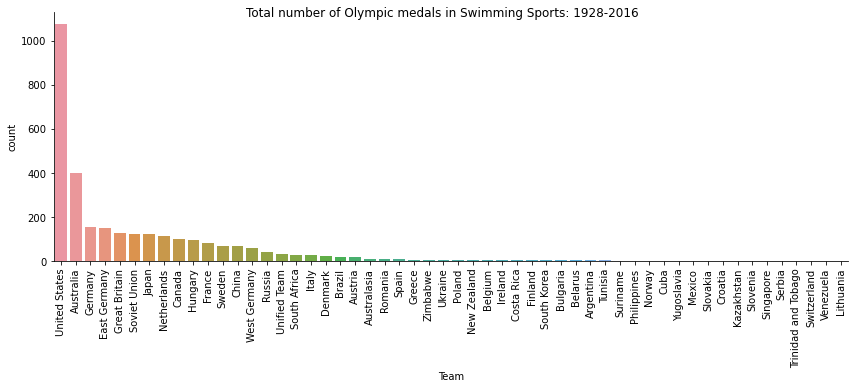

In [191]:
# Chart of total medal count

medal_count = sns.catplot(data=swim, kind="count", x="Team", order = swim["Team"].value_counts().index, height=4, aspect=3).set_xticklabels(rotation=90)
medal_count.fig.suptitle("Total number of Olympic medals in Swimming Sports: 1928-2016")

# Gymanistics data analysis
Same process but applied to Female Gymnastic events

In [194]:
athlete_raw["Sport"].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Speed Skating',
       'Cross Country Skiing', 'Athletics', 'Ice Hockey', 'Swimming',
       'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Art Competitions', 'Alpine Skiing', 'Handball', 'Weightlifting',
       'Wrestling', 'Luge', 'Water Polo', 'Hockey', 'Rowing', 'Bobsleigh',
       'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo',
       'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon',
       'Figure Skating', 'Golf', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Table Tennis', 'Nordic Combined',
       'Baseball', 'Rhythmic Gymnastics', 'Freestyle Skiing',
       'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon',
       'Ski Jumping', 'Curling', 'Snowboarding', 'Rugby',
       'Short Track Speed Skating', 'Skeleton', 'Lacrosse', 'Polo',
       'Cricket', 'Racquets', 'Motorboating', 'Military Ski Patrol',
       'Croquet', 'Jeu De Paume', 'Roque', 'Al

In [195]:
# Create df only for gymnastics

df_gym = athlete_raw.loc[athlete_raw["Sport"]=="Gymnastics"]
df_gym.sample(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
252582,126488,Charles Alfred Vigurs,M,23.0,NaN,NaN,Great Britain,GBR,1912 Summer,1912,Summer,Stockholm,Gymnastics,Gymnastics Men's Team All-Around,Bronze
134601,67735,Rafael Argelio Lecuona Asencio,M,24.0,NaN,NaN,Cuba,CUB,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Individual All-Around,NaN
186952,93982,Plamen Petkov,M,20.0,167.0,61.0,Bulgaria,BUL,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Men's Parallel Bars,NaN
74694,37928,Philippe Gaille,M,20.0,168.0,60.0,Switzerland,SUI,1972 Summer,1972,Summer,Munich,Gymnastics,Gymnastics Men's Individual All-Around,NaN
72276,36774,Mario Franke,M,24.0,170.0,62.0,Germany,GER,1992 Summer,1992,Summer,Barcelona,Gymnastics,Gymnastics Men's Individual All-Around,NaN


In [197]:
# keep just female athletes

df_gymf = df_gym.loc[df_gym["Sex"]=="F"]
df_gymf.sample(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
235416,118034,Miho Takenaka,F,15.0,152.0,42.0,Japan,JPN,2000 Summer,2000,Summer,Sydney,Gymnastics,Gymnastics Women's Uneven Bars,NaN
47817,24654,Dlia Vieirinho da Cunha-Sammer,F,23.0,164.0,63.0,Portugal,POR,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Women's Individual All-Around,NaN
200194,100542,Kate Geraldine Richardson,F,20.0,152.0,47.0,Canada,CAN,2004 Summer,2004,Summer,Athina,Gymnastics,Gymnastics Women's Balance Beam,NaN
228495,114755,Anna Stein,F,18.0,166.0,56.0,West Germany,FRG,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Horse Vault,NaN
237741,119233,Asuka Teramoto,F,20.0,145.0,37.0,Japan,JPN,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Women's Individual All-Around,NaN


In [201]:
df_gymf["Event"].unique()

array(["Gymnastics Women's Individual All-Around",
       "Gymnastics Women's Team All-Around",
       "Gymnastics Women's Floor Exercise",
       "Gymnastics Women's Horse Vault", "Gymnastics Women's Uneven Bars",
       "Gymnastics Women's Balance Beam",
       "Gymnastics Women's Team Portable Apparatus"], dtype=object)

In [202]:
# Rename events to something shorter

df_gymf["Event"] = df_gymf["Event"].str.replace(r'(^.*Individual All-Around.*$)', "All-Around")
df_gymf["Event"] = df_gymf["Event"].str.replace(r'(^.*Team All-Around.*$)', "Team")
df_gymf["Event"] = df_gymf["Event"].str.replace(r'(^.*Floor.*$)', "Floor")
df_gymf["Event"] = df_gymf["Event"].str.replace(r'(^.*Vault.*$)', "Vault")
df_gymf["Event"] = df_gymf["Event"].str.replace(r'(^.*Bars.*$)', "Uneven Bars")
df_gymf["Event"] = df_gymf["Event"].str.replace(r'(^.*Balance Beam.*$)', "Balance Beam")

<ipython-input-202-d7d405c3c813>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_gymf["Event"] = df_gymf["Event"].str.replace(r'(^.*Individual All-Around.*$)', "All-Around")
<ipython-input-202-d7d405c3c813>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gymf["Event"] = df_gymf["Event"].str.replace(r'(^.*Individual All-Around.*$)', "All-Around")
<ipython-input-202-d7d405c3c813>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_gymf["Event"] = df_gymf["Event"].str.replace(r'(^.*Team All-Around.*$)', "Team")
<ipython-input-202-d7d405c3c813>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [203]:
df_gymf.sample(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
75039,38079,Luiza Galiulina,F,16.0,145.0,35.0,Uzbekistan,UZB,2008 Summer,2008,Summer,Beijing,Gymnastics,Floor,NaN
221650,111399,Melina Debora Sirolli,F,16.0,157.0,43.0,Argentina,ARG,2000 Summer,2000,Summer,Sydney,Gymnastics,Floor,NaN
165929,83333,Laura Muoz Ilundain,F,18.0,150.0,42.0,Spain,ESP,1988 Summer,1988,Summer,Seoul,Gymnastics,Floor,NaN
123569,62435,Kong Yun-Jin,F,14.0,157.0,39.0,South Korea,KOR,1996 Summer,1996,Summer,Atlanta,Gymnastics,All-Around,NaN
225297,113198,Gail Evelyn Sontgerath (-Whitney),F,16.0,162.0,54.0,United States,USA,1960 Summer,1960,Summer,Roma,Gymnastics,Team,NaN
101445,51302,Tetiana Kostiantynivna Hutsu,F,15.0,NaN,NaN,Unified Team,EUN,1992 Summer,1992,Summer,Barcelona,Gymnastics,Balance Beam,NaN
69218,35292,Mariya Yevgenyevna Filatova (-Kurbatova),F,14.0,136.0,30.0,Soviet Union,URS,1976 Summer,1976,Summer,Montreal,Gymnastics,Vault,NaN
231650,116213,Aiko Sugihara,F,16.0,146.0,35.0,Japan,JPN,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Team,NaN
90541,45868,Kazue Hanyu (-Kasamatsu),F,18.0,160.0,52.0,Japan,JPN,1968 Summer,1968,Summer,Mexico City,Gymnastics,Vault,NaN
1036,581,Elisabeta Abrudeanu,F,26.0,NaN,NaN,Romania,ROU,1952 Summer,1952,Summer,Helsinki,Gymnastics,All-Around,NaN


In [204]:
"""This is the same methof the author of the Kaggle notebook uses. 
Interesting because she gets rid of the "Team Portable Aparatus" event which was featured on the '56 games
but was removed afterwards, so not really worth keeping on the data."""

# Curious to compare number of results with this method and with the previous one


f_events = ["Gymnastics Women\'s Individual All-Around", "Gymnastics Women\'s Team All-Around", "Gymnastics Women\'s Horse Vault", "Gymnastics Women\'s Floor Exercise",
               "Gymnastics Women\'s Uneven Bars", "Gymnastics Women\'s Balance Beam"]
women = df_gym.loc[df_gym['Event'].isin(f_events)]

women.sample(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
117869,59642,Brigitte Helene Kiesler (Krst-),F,27.0,157.0,52.0,Germany,GER,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Women's Horse Vault,NaN
166023,83377,Olga Munteanu,F,24.0,NaN,NaN,Romania,ROU,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Women's Team All-Around,NaN
160511,80531,Hanako Miura,F,21.0,150.0,40.0,Japan,JPN,1996 Summer,1996,Summer,Atlanta,Gymnastics,Gymnastics Women's Balance Beam,NaN
38006,19530,Coralie Chacon,F,19.0,152.0,41.0,France,FRA,2004 Summer,2004,Summer,Athina,Gymnastics,Gymnastics Women's Balance Beam,NaN
198221,99528,Annika Louise Reeder,F,16.0,157.0,51.0,Great Britain,GBR,1996 Summer,1996,Summer,Atlanta,Gymnastics,Gymnastics Women's Balance Beam,NaN


In [205]:
# Rename events to something shorter

women["Event"] = women["Event"].str.replace(r'(^.*Individual All-Around.*$)', "All-Around")
women["Event"] = women["Event"].str.replace(r'(^.*Team All-Around.*$)', "Team")
women["Event"] = women["Event"].str.replace(r'(^.*Floor.*$)', "Floor")
women["Event"] = women["Event"].str.replace(r'(^.*Vault.*$)', "Vault")
women["Event"] = women["Event"].str.replace(r'(^.*Bars.*$)', "Uneven Bars")
women["Event"] = women["Event"].str.replace(r'(^.*Balance Beam.*$)', "Balance Beam")

<ipython-input-205-a1d47e25c19f>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  women["Event"] = women["Event"].str.replace(r'(^.*Individual All-Around.*$)', "All-Around")
<ipython-input-205-a1d47e25c19f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  women["Event"] = women["Event"].str.replace(r'(^.*Individual All-Around.*$)', "All-Around")
<ipython-input-205-a1d47e25c19f>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  women["Event"] = women["Event"].str.replace(r'(^.*Team All-Around.*$)', "Team")
<ipython-input-205-a1d47e25c19f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [206]:
women.sample(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
263359,131791,Wu Jiani,F,18.0,162.0,49.0,China,CHN,1984 Summer,1984,Summer,Los Angeles,Gymnastics,Uneven Bars,NaN
143279,71914,Lu Li,F,15.0,136.0,30.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Gymnastics,Uneven Bars,Gold
104755,53021,Ana Mara Izurieta Garca,F,19.0,157.0,52.0,Spain,ESP,2012 Summer,2012,Summer,London,Gymnastics,Balance Beam,NaN
41092,21181,Amy Yuen-Yee Chow (-Ho),F,22.0,155.0,44.0,United States,USA,2000 Summer,2000,Summer,Sydney,Gymnastics,All-Around,NaN
210230,105557,Gabriella Santarelli,F,24.0,155.0,54.0,Italy,ITA,1960 Summer,1960,Summer,Roma,Gymnastics,All-Around,NaN


In [207]:
women.shape

(8947, 15)

In [209]:
df_gymf[df_gymf["Event"]=="Gymnastics Women's Team Portable Apparatus"].count() #182 records

ID        182
Name      182
Sex       182
Age       177
Height     54
Weight     54
Team      182
NOC       182
Games     182
Year      182
Season    182
City      182
Sport     182
Event     182
Medal      48
dtype: int64

In [210]:
df_gymf.shape

(9129, 15)

In [211]:
# all records on df_gymf minus the removed event do equal the name number of records from the othe df
#both methods would yield the same results

9129-182

8947

In [218]:
# Now keep only medal winning athletes

fgym = women.dropna(subset=["Medal"])
fgym.shape

(653, 15)

In [219]:
# Ranking 

ranking_fgym = fgym["Team"].value_counts().to_frame()
ranking_fgym

,Team
Soviet Union,133
Romania,121
United States,94
Hungary,52
Czechoslovakia,52
Russia,47
East Germany,45
China,35
Great Britain,14
Italy,12


In [221]:
ranking_fgym.to_csv("fgym_ranking.csv", encoding="utf-8")

In [225]:
# Get dataframe for heat map

fgym_filter = fgym.groupby(["Team", "Event"]).size().reset_index(name="Total Medals")
fgym_filter

,Team,Event,Total Medals
0,Bulgaria,Floor,1
1,China,All-Around,3
2,China,Balance Beam,5
3,China,Team,17
4,China,Uneven Bars,8
...,...,...,...
67,United States,Balance Beam,10
68,United States,Floor,9
69,United States,Team,55
70,United States,Uneven Bars,8


In [229]:
fgym_filter.sort_values(by=["Total Medals"], ascending=False)

,Team,Event,Total Medals
39,Romania,Team,71
51,Soviet Union,Team,56
69,United States,Team,55
9,Czechoslovakia,Team,42
28,Hungary,Team,36
...,...,...,...
20,Germany,Uneven Bars,1
22,Great Britain,Floor,1
24,Great Britain,Uneven Bars,1
33,Netherlands,Balance Beam,1


In [223]:
fgym_filter.to_csv("f-gymnastics-data.csv", encoding="utf-8")

Text(0.5, 0.98, 'Total number of Olympic medals in Female Gymnastics: 1928-2016')

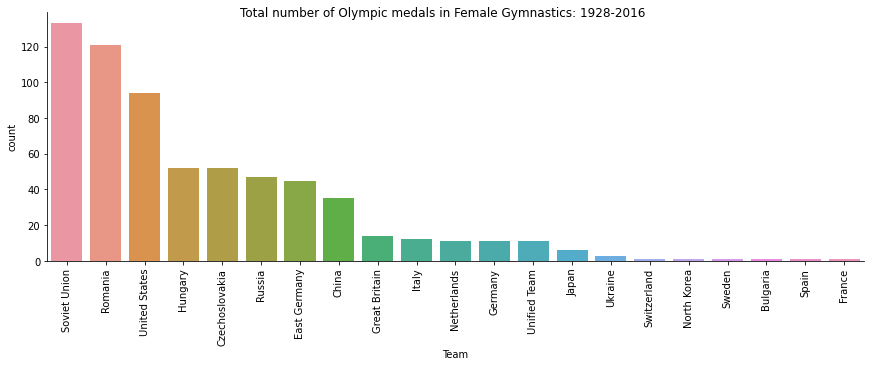

In [220]:
# Chart of total medal count

medal_count = sns.catplot(data=fgym, kind="count", x="Team", order = fgym["Team"].value_counts().index, height=4, aspect=3).set_xticklabels(rotation=90)
medal_count.fig.suptitle("Total number of Olympic medals in Female Gymnastics: 1928-2016")